# Feature Selection Methods

## Introduction

In this lesson, you'll learn about the different techniques you can use to only use features that are most relevant to your model.

## Objectives

You will be able to:

- Use feature selection to obtain the optimal subset of features in a dataset 
- Identify when it is appropriate to use certain methods of feature selection 

## Feature Selection

Feature selection is the process by which you **select a subset of features** relevant for model construction. Feature selection comes with several benefits, the most obvious being the improvement in performance of a machine learning algorithm. Other benefits include:

* Decrease in computational complexity: As the number of features is reduced in a model, the easier it will be to compute the parameters of your model. It will also mean a decrease in the amount of data storage required to maintain the features of your model 
* Understanding your data: In the process of feature selection, you will potentially gain more understanding of how features relate to one another 

Now, let's look at the different types of feature selection approaches and their advantages/disadvantages.

### Types of Feature Selection

Like many things in data science, there is no clear and easy answer for deciding which features to include in a model. There are, however, different strategies you can use to process features in an efficient way: 

* Domain knowledge
* Filter methods
* Wrapper methods
* Embedded methods

#### Domain Knowledge   

One of the most important aspects when determining important features is the knowledge of the specific domain related to your dataset. This might mean reading past research papers that have explored similar topics or asking key stakeholders to determine what they believe the most important factors are for predicting the target variable.

#### Filter Methods 

Filter methods are feature selection methods carried out as a preprocessing step before even running a model. Filter methods work by observing characteristics of how variables are related to one another. Depending on the model that is being used, different metrics are used to determine which features will get eliminated and which will remain. Typically, filter methods will return a "feature ranking" that will tell you how features are ordered in relation to one another. They will remove the variables that are considered redundant. It's up to the data scientist to determine the cut-off point at which they will keep the top $n$ features, and this $n$ is usually determined through cross-validation.

<img src= "./images/new_filter.png">

In the linear regression context, a common filter method is to eliminate features that are highly **correlated** with one another.

Another method is to use a ***variance threshold***. This sets some threshold of required variance among features in order to include them in a model. The thought process behind this is that if variables do not have a high variance, they will not change much and will therefore not have much impact on our dependent variable.

#### Wrapper Methods   

Wrapper methods determine the optimal subset of features using different combinations of features to train models and then calculating performance. Every subset is used to train models and then evaluated on a test set. As you might imagine, wrapper methods can end up being very computationally intensive, however, they are highly effective in determining the optimal subset. Because wrapper methods are so time-consuming, it becomes challenging to use them with large feature sets. 

<img src = "./images/new_wrapper.png">

An example of a wrapper method in linear regression is ***recursive feature elimination***, which starts with all features included in a model and removes them one by one. After the model has had a feature removed, whichever subset of features resulted in the least significant deterioration of the model fit will indicate which omitted feature is the least useful for prediction.

The opposite of this process is ***forward selection***, which undergoes the same process in reverse. It begins with a single feature and continues to add the one feature at a time that improves model performance the most. 

#### Embedded Methods 

Embedded methods are feature selection methods that are included within the actual formulation of your machine learning algorithm. The most common kind of embedded method is regularization, in particular lasso regression, because it has the capability of reducing your set of features automatically.

<img src = "./images/new_embedded.png">

## Feature Selection in Action

Now, we're going to review the process behind performing feature selection with a dataset pertaining to diabetes. The dataset contains the independent variables age, sex, body mass index, blood pressure, and 6 different blood serum measurements. The target variable represents a quantitative measurement progression of diabetes from one year after a baseline observation. With feature selection, our goal is to find a model that is able to maintain high accuracy while not overfitting to noise.

### Preprocess the Data

To begin with, we are going to load the necessary libraries and functions, load the data, and create a dummy variable for the variable `'SEX'`. The target variable is in the column `'Y'`. 

In [1]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_selection import (VarianceThreshold, SelectKBest, f_regression, mutual_info_regression, 
    RFE, RFECV)
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures

# Load the data
df = pd.read_csv('diabetes.tab.txt', sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [2]:
# Obtain the target and features from the DataFrame
target = df['Y']
features = df.drop(columns='Y')

In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=20, test_size=0.2)

In [14]:
# Create dummy variable for sex
ohe = OneHotEncoder(drop='first', sparse=False)
train_female = ohe.fit_transform(X_train[['SEX']]).flatten()
test_female = ohe.transform(X_test[['SEX']]).flatten()

For both regularization (an embedded method) and various filters, it is important to standardize the data. This next cell is fitting a `StandardScaler` from `sklearn` to the training data and using it to transform all of the numeric features.

In [15]:
# Initialize the scaler
scaler = StandardScaler()

# Scale every feature except the binary column - female
transformed_training_features = scaler.fit_transform(X_train.iloc[:,:-1])
transformed_testing_features = scaler.transform(X_test.iloc[:,:-1])

# Convert the scaled features into a DataFrame
X_train_transformed = pd.DataFrame(scaler.transform(X_train.iloc[:,:-1]), 
                                   columns=X_train.columns[:-1], 
                                   index=X_train.index)
X_test_transformed = pd.DataFrame(scaler.transform(X_test.iloc[:,:-1]), 
                                  columns=X_train.columns[:-1], 
                                  index=X_test.index)

# Add binary column back in
X_train_transformed['female'] = train_female
X_test_transformed['female'] = test_female

X_train_transformed

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,female
171,-0.433522,-0.947549,-0.967597,-2.067847,-1.623215,-1.280312,-0.347527,-0.852832,-1.095555,0.0
388,1.117754,1.055354,-0.516691,1.142458,-0.168101,-0.129601,-0.424950,-0.083651,0.543382,1.0
268,1.350445,1.055354,1.850570,1.427819,0.413945,0.764667,-1.044334,1.454710,0.597504,1.0
31,-0.511086,-0.947549,-1.373413,-1.711146,-0.837453,-1.148802,1.278358,-1.622013,-0.796071,0.0
427,-0.743778,1.055354,0.114579,-0.141664,-1.565010,-1.339491,-0.115257,-0.852832,-0.970101,1.0
...,...,...,...,...,...,...,...,...,...,...
218,-0.898905,-0.947549,-1.373413,-0.855065,-0.138998,0.278080,-0.889488,0.685530,0.130301,0.0
412,1.583137,-0.947549,1.782934,1.285138,0.297536,0.251778,0.349281,-0.083651,0.113090,0.0
223,-2.139926,-0.947549,-0.494145,-1.354445,-1.244885,-1.286887,0.271858,-0.852832,-0.397142,0.0
271,0.807499,1.055354,0.182215,0.857098,-0.924760,-0.464951,-0.812065,-0.083651,-0.397142,1.0


In [18]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly_train = pd.DataFrame(poly.fit_transform(X_train_transformed),
                            columns=poly.get_feature_names(X_train_transformed.columns))
X_poly_test = pd.DataFrame(poly.transform(X_test_transformed),
                           columns=poly.get_feature_names(X_test_transformed.columns))
X_poly_train.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,female,...,S3^2,S3 S4,S3 S5,S3 female,S4^2,S4 S5,S4 female,S5^2,S5 female,female^2
0,-0.433522,-0.947549,-0.967597,-2.067847,-1.623215,-1.280312,-0.347527,-0.852832,-1.095555,0.0,...,0.120775,0.296382,0.380734,-0.000000,0.727322,0.934324,-0.000000,1.200240,-0.000000,0.0
1,1.117754,1.055354,-0.516691,1.142458,-0.168101,-0.129601,-0.424950,-0.083651,0.543382,1.0,...,0.180582,0.035548,-0.230910,-0.424950,0.006998,-0.045455,-0.083651,0.295264,0.543382,1.0
2,1.350445,1.055354,1.850570,1.427819,0.413945,0.764667,-1.044334,1.454710,0.597504,1.0,...,1.090634,-1.519204,-0.623994,-1.044334,2.116182,0.869195,1.454710,0.357011,0.597504,1.0
3,-0.511086,-0.947549,-1.373413,-1.711146,-0.837453,-1.148802,1.278358,-1.622013,-0.796071,0.0,...,1.634199,-2.073513,-1.017664,0.000000,2.630925,1.291237,-0.000000,0.633729,-0.000000,0.0
4,-0.743778,1.055354,0.114579,-0.141664,-1.565010,-1.339491,-0.115257,-0.852832,-0.970101,1.0,...,0.013284,0.098295,0.111811,-0.115257,0.727322,0.827333,-0.852832,0.941095,-0.970101,1.0


We'll also use `PolynomialFeatures` to transform the data and create interactions and squared terms:

As you can see, we now have 65 total columns! You can imagine that this model will greatly overfit to the data. Let's try it out with our training and test set.

### Establish Baseline Model Metrics

Before we perform feature selection, we should see how well the baseline model performs. Because we are going to be running many different models here, we have created a function to ensure that we are following the D.R.Y. principle. 

In [19]:
def run_model(model, X_train, X_test, y_train, y_test, display=True):
    
    train_r2 = model.score(X_train, y_train)
    y_pred_train = model.predict(X_train)
    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    
    test_r2 = model.score(X_test, y_test)
    y_pred_test = model.predict(X_test)
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
    
    if (display):
        print('Training R^2:', train_r2)
        print('Training Root Mean Squared Error:', train_rmse)
        print('\n----------------\n')
        print('Testing R^2:', test_r2)
        print('Testing Root Mean Squared Error:', test_rmse)
        
    return test_r2, test_rmse

In [20]:
lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)

poly_r2, poly_rmse = run_model(lr_poly, X_poly_train, X_poly_test, y_train, y_test)

Training R^2: 0.6129179802056755
Training Root Mean Squared Error: 47.7570328380761

----------------

Testing R^2: 0.35978989828879826
Testing Root Mean Squared Error: 61.70690597579994


Clearly, the model has fit very well to the training data, but it has fit to a lot of noise. It's time to get rid of some features to see if this improves the model.

## Filter Methods  

Let's begin by trying out some filter methods for feature selection. The benefit of filter methods is that they can provide us with some useful visualizations for helping us gain an understanding about the characteristics of our data. To begin with, let's use a simple variance threshold to eliminate the features with low variance.

### `VarianceThreshold`

The `VarianceThreshold` class from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html)) works similarly to other preprocessing tools like `StandardScaler`. You fit it on the training data and transform both the train and test data, before fitting the model or making predictions.

The default variance threshold is 0.0, meaning that `VarianceThreshold` will eliminate only features that have the same value in every row. This means that if you don't specify any parameters, there will be no difference in the features used for this particular dataset:

In [22]:
selector = VarianceThreshold()
reduced_feature_train = pd.DataFrame(selector.fit_transform(X_poly_train), columns=X_poly_train.columns, index=X_poly_train.index)
reduced_feature_test = pd.DataFrame(selector.transform(X_poly_test), columns=X_poly_test.columns, index=X_poly_test.index)

lr = LinearRegression()
lr.fit(reduced_feature_train, y_train)
reduced_r2, reduced_rmse = run_model(lr, reduced_feature_train, reduced_feature_test, y_train, y_test)

print('\n----------------\n')
print(f"{reduced_feature_train.shape[1]} out of {X_poly_train.shape[1]} features used")
print('Baseline R-Squared:', round(poly_r2, 2))
print('Reduced R-Squared: ', round(reduced_r2, 2))

Training R^2: 0.6129806656961385
Training Root Mean Squared Error: 47.753165706454304

----------------

Testing R^2: 0.362838607548132
Testing Root Mean Squared Error: 61.559805112675456

----------------

65 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.36


We can also try out some different variance thresholds to see how they impact the results:

In [23]:
np.linspace(np.percentile(selector.variances_,10), np.percentile(selector.variances_, 90), 10)

array([0.44404269, 0.59910866, 0.75417464, 0.90924061, 1.06430658,
       1.21937256, 1.37443853, 1.5295045 , 1.68457048, 1.83963645])

In [24]:
threshold_ranges = np.linspace(np.percentile(selector.variances_,10), np.percentile(selector.variances_, 90), 10)
reduced_r2s = []
for thresh in threshold_ranges:
    selector = VarianceThreshold(thresh)
    reduced_feature_train = selector.fit_transform(X_poly_train)
    reduced_feature_test = selector.transform(X_poly_test)
    lr = LinearRegression()
    lr.fit(reduced_feature_train, y_train)
    reduced_r2, reduced_rmse = run_model(lr, reduced_feature_train, reduced_feature_test, y_train, y_test, display=False)
    reduced_r2s.append(reduced_r2)
    
    print('Variance threshold:', thresh)
    print(f"{reduced_feature_train.shape[1]} out of {X_poly_train.shape[1]} features used")
    print('Baseline R-Squared:', round(poly_r2, 2))
    print('Reduced R-Squared: ', round(reduced_r2, 2))
    print('\n--------------------------------------------------------------------\n')

Variance threshold: 0.44404268801979535
58 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.36

--------------------------------------------------------------------

Variance threshold: 0.5991086615890968
53 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.36

--------------------------------------------------------------------

Variance threshold: 0.7541746351583984
53 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.36

--------------------------------------------------------------------

Variance threshold: 0.9092406087276999
45 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.41

--------------------------------------------------------------------

Variance threshold: 1.0643065822970015
14 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.04

--------------------------------------------------------------------

Variance threshold: 1.2193725558663029
13 out of 65 features use

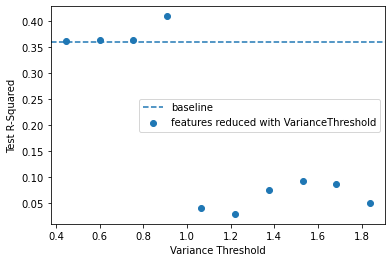

In [25]:
fig, ax = plt.subplots()
ax.scatter(threshold_ranges, reduced_r2s, label="features reduced with VarianceThreshold")
ax.axhline(y=poly_r2, linestyle="--", label="baseline")
ax.set_xlabel("Variance Threshold")
ax.set_ylabel("Test R-Squared")
ax.legend();

Well, that did not seem to eliminate the features very well. For some of the lower thresholds it only does a little better than the base polynomial. And for larger thresholds performance is much worse than baseline.

### `SelectKBest`

`SelectKBest` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)) works a little differently. Instead of just looking at the feature values, this transformer uses a particular statistic to compare features to the target one by one. Then it selects the top `k` features based on this statistic. The default `k` is 10.

One statistic we can try is `f_regression` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html)):

In [26]:
selector = SelectKBest(score_func=f_regression)
X_k_best_train = selector.fit_transform(X_poly_train, y_train)
X_k_best_test = selector.transform(X_poly_test)
lr = LinearRegression()
lr.fit(X_k_best_train, y_train)
k_best_r2, k_best_rmse = run_model(lr, X_k_best_train, X_k_best_test, y_train, y_test)

print('\n----------------\n')
print(f"{X_k_best_train.shape[1]} out of {X_poly_train.shape[1]} features used")
print('Baseline R-Squared:', round(poly_r2, 2))
print('Reduced R-Squared: ', round(k_best_r2, 2))

Training R^2: 0.5272198197441764
Training Root Mean Squared Error: 52.77952383154054

----------------

Testing R^2: 0.40576194869484794
Testing Root Mean Squared Error: 59.45012044763017

----------------

10 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.41


Another is `mutual_info_regression` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html)):

In [27]:
selector = SelectKBest(score_func=mutual_info_regression)
X_k_best_train = selector.fit_transform(X_poly_train, y_train)
X_k_best_test = selector.transform(X_poly_test)
lr = LinearRegression()
lr.fit(X_k_best_train, y_train)
k_best_r2, k_best_rmse = run_model(lr, X_k_best_train, X_k_best_test, y_train, y_test)

print('\n----------------\n')
print(f"{X_k_best_train.shape[1]} out of {X_poly_train.shape[1]} features used")
print('Baseline R-Squared:', round(poly_r2, 2))
print('Reduced R-Squared: ', round(k_best_r2, 2))

Training R^2: 0.4930791650720181
Training Root Mean Squared Error: 54.651980860609605

----------------

Testing R^2: 0.404926471886769
Testing Root Mean Squared Error: 59.491898107912334

----------------

10 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.4


Looks like `f_regression` was more successful. Let's try that with some different values for `k`:

In [28]:
ks = np.arange(1, len(X_poly_train.columns), 10)
reduced_r2s = []
for k in ks:
    selector = SelectKBest(score_func=f_regression, k=k)
    X_k_best_train = selector.fit_transform(X_poly_train, y_train)
    X_k_best_test = selector.transform(X_poly_test)
    lr = LinearRegression()
    lr.fit(X_k_best_train, y_train)
    k_best_r2, k_best_rmse = run_model(lr, X_k_best_train, X_k_best_test, y_train, y_test, display=False)
    reduced_r2s.append(k_best_r2)

    print(f"{k} out of {X_poly_train.shape[1]} features used")
    print('Baseline R-Squared:', round(poly_r2, 2))
    print('Reduced R-Squared: ', round(k_best_r2, 2))
    print('\n--------------------------------------------------------------------\n')

1 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.22

--------------------------------------------------------------------

11 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.41

--------------------------------------------------------------------

21 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.38

--------------------------------------------------------------------

31 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.38

--------------------------------------------------------------------

41 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.38

--------------------------------------------------------------------

51 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.36

--------------------------------------------------------------------

61 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.36

-----------------------------------

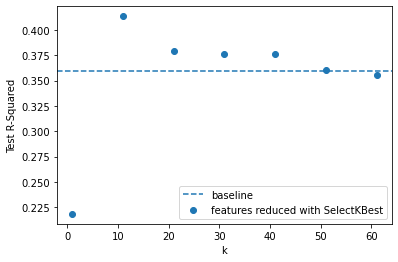

In [29]:
fig, ax = plt.subplots()
ax.scatter(ks, reduced_r2s, label="features reduced with SelectKBest")
ax.axhline(y=poly_r2, linestyle="--", label="baseline")
ax.set_xlabel("k")
ax.set_ylabel("Test R-Squared")
ax.legend(loc="lower right");

Looks like the default `k` of 10 was pretty good! If we wanted to tune this further we would probably try some more values near 10.

## Wrapper Methods

Now let's use recursive feature elimination (RFE) to try out a wrapper method. This method fits a model, assigns weights to features based on the model fit (in linear regression, these weights are the coefficients), and repeatedly removes the feature with the smallest weight until the desired fraction of features remains.

Both this approach and the `SelectKBest` approach use both features and target. The difference is that `SelectKBest` computes a pairwise statistic for each feature vs. the target, whereas RFE actually fits the kind of model you are using.

### `RFE`

The `RFE` class from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)) reduces the number of features down to 50% of the original features. Here it is in action: 

In [30]:
rfe = RFE(LinearRegression())
X_rfe_train = rfe.fit_transform(X_poly_train, y_train)
X_rfe_test = rfe.transform(X_poly_test)
lr = LinearRegression()
lr.fit(X_rfe_train, y_train)

rfe_r2, rfe_rmse = run_model(lr, X_rfe_train, X_rfe_test, y_train, y_test)
print('\n----------------\n')
print(f"{X_rfe_train.shape[1]} out of {X_poly_train.shape[1]} features used")
print('Baseline R-Squared:', round(poly_r2, 2))
print('Reduced R-Squared: ', round(rfe_r2, 2))

Training R^2: 0.5342098278753737
Training Root Mean Squared Error: 52.38790089892928

----------------

Testing R^2: 0.3488576042721395
Testing Root Mean Squared Error: 62.23153257096024

----------------

32 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.35


We can also tune the number of features to select:

In [31]:
feature_ns = np.arange(1, len(X_poly_train.columns), 10)
reduced_r2s = []
for n in feature_ns:
    rfe = RFE(LinearRegression(), n_features_to_select=n)
    X_rfe_train = rfe.fit_transform(X_poly_train, y_train)
    X_rfe_test = rfe.transform(X_poly_test)
    lr = LinearRegression()
    lr.fit(X_rfe_train, y_train)
    rfe_r2, rfe_rmse = run_model(lr, X_rfe_train, X_rfe_test, y_train, y_test, display=False)
    reduced_r2s.append(rfe_r2)

    print(f"{n} out of {X_poly_train.shape[1]} features used")
    print('Baseline R-Squared:', round(poly_r2, 2))
    print('Reduced R-Squared: ', round(rfe_r2, 2))
    print('\n--------------------------------------------------------------------\n')

1 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.35

--------------------------------------------------------------------

11 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.37

--------------------------------------------------------------------

21 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.32

--------------------------------------------------------------------

31 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.35

--------------------------------------------------------------------

41 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.35

--------------------------------------------------------------------

51 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.37

--------------------------------------------------------------------

61 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.36

-----------------------------------

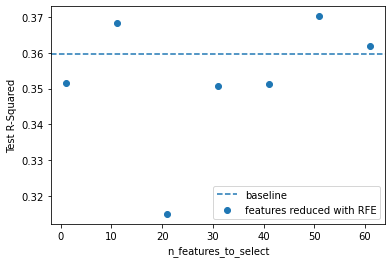

In [32]:
fig, ax = plt.subplots()
ax.scatter(feature_ns, reduced_r2s, label="features reduced with RFE")
ax.axhline(y=poly_r2, linestyle="--", label="baseline")
ax.set_xlabel("n_features_to_select")
ax.set_ylabel("Test R-Squared")
ax.legend(loc="lower right");

It looks like sometimes `RFE` is able to get better metrics than the baseline polynomial model, but there is a lot of variance in the results.

### `RFECV`

A tool to address this kind of variance is `RFECV` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html)). The "CV" in the name stands for "cross-validation". This estimator fits _multiple_ models for each number of features, and thus also automatically selects an `n_features_to_select` value for you:

In [33]:
rfe_cv = RFECV(LinearRegression(), cv=15)
X_rfe_train = rfe_cv.fit_transform(X_poly_train, y_train)
X_rfe_test = rfe_cv.transform(X_poly_test)
lr = LinearRegression()
lr.fit(X_rfe_train, y_train)

rfe_r2, rfe_rmse = run_model(lr, X_rfe_train, X_rfe_test, y_train, y_test)
print('\n----------------\n')
print(f"{X_rfe_train.shape[1]} out of {X_poly_train.shape[1]} features used")
print('Baseline R-Squared:', round(poly_r2, 2))
print('Reduced R-Squared: ', round(rfe_r2, 2))

Training R^2: 0.536034667217778
Training Root Mean Squared Error: 52.285179410330315

----------------

Testing R^2: 0.3448101712338365
Testing Root Mean Squared Error: 62.424645293014194

----------------

34 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.34


With recursive feature elimination, we went from an $R^2$ score of 0.36 to 0.38 (a tiny bit better). Let's see if we can improve upon these results even more by trying embedded methods.

## Embedded Methods  

To compare to our other methods, we will use lasso as the embedded method of feature selection. Luckily for us, `sklearn` has a built-in class `LassoCV` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)) to help us find the optimal features! It performs cross validation to determine the best regularization parameter (how much to penalize our function).

In [34]:
lasso = LassoCV(max_iter=10000, cv=15)

lasso.fit(X_poly_train, y_train)
lasso_r2, lasso_rmse = run_model(lasso, X_poly_train, X_poly_test, y_train, y_test)

print('\n----------------\n')
print('The optimal alpha for the lasso regression is: ', lasso.alpha_)
print(f"{sum(abs(lasso.coef_) < 10**(-10))} out of {X_poly_train.shape[1]} features used")
print('Baseline R-Squared:', round(poly_r2, 2))
print('Reduced R-Squared: ', round(lasso_r2, 2))

Training R^2: 0.5796331222398328
Training Root Mean Squared Error: 49.76798773972998

----------------

Testing R^2: 0.42197481285681404
Testing Root Mean Squared Error: 58.63350974447023

----------------

The optimal alpha for the lasso regression is:  1.0793942862389219
39 out of 65 features used
Baseline R-Squared: 0.36
Reduced R-Squared:  0.42


As we can see, the regularization had minimal effect on the performance of the model, but it did improve the metrics for the test set ever so slightly!

There are no set steps someone should take in order to determine the optimal feature set. In fact, now there are automated machine learning pipelines that will determine the optimal subset of features for a given problem. One of the most important and often overlooked methods of feature selection is using domain knowledge about a given area to either eliminate features or create new ones.

## Additional Resources

- [Feature Selection](https://www.researchgate.net/profile/Amparo_Alonso-Betanzos/publication/221252792_Filter_Methods_for_Feature_Selection_-_A_Comparative_Study/links/543fd9ec0cf21227a11b8e05.pdf)


- [An Introduction to Variable and Feature Selection](http://www.jmlr.org/papers/volume3/guyon03a/guyon03a.pdf)

## Summary

This lesson formalized the different types of feature selection methods and introduced some new techniques to you. You learned about filter methods, wrapper methods, and embedded methods as well as their advantages and disadvantages. Then you saw how these methods can be applied using classes from scikit-learn.